# Load & Visualize Images

Initialized environment variables listed in: /mnt/workspace/__ing/cving/brain-tumor-detection/.env
Image: Tr-no_0298.jpg, Label: 0, Tensor shape: torch.Size([3, 224, 224])


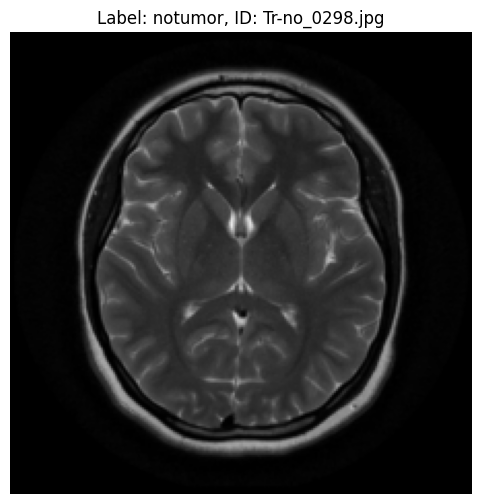

Image: Tr-pi_1254.jpg, Label: 1, Tensor shape: torch.Size([3, 224, 224])


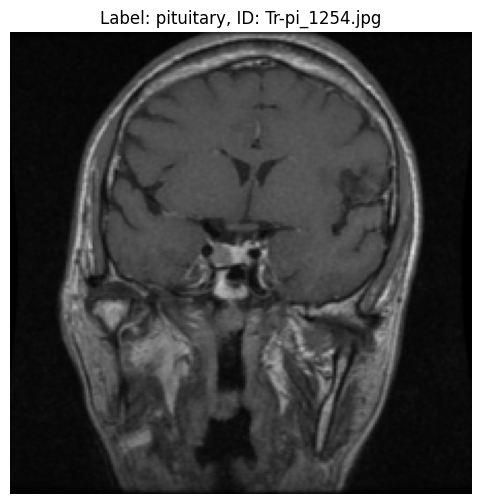

Image: Tr-me_0331.jpg, Label: 2, Tensor shape: torch.Size([3, 224, 224])


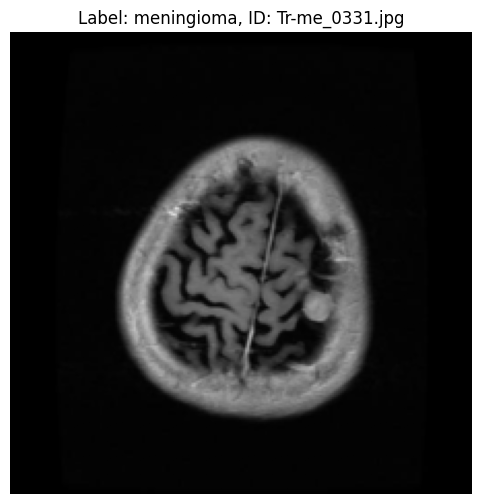

Image: Tr-gl_1006.jpg, Label: 3, Tensor shape: torch.Size([3, 224, 224])


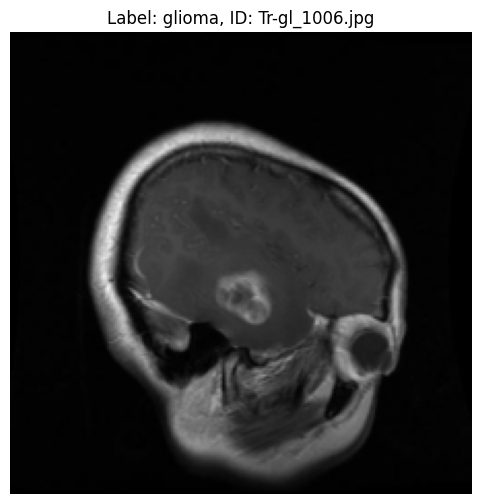

In [1]:
import os
import sys

PROJECT_DIR="/mnt/workspace/__ing/cving/brain-tumor-detection"
sys.path.append(PROJECT_DIR)

from utils.utils import initialize_env_variables
from utils.image import (load_images, visualize_image, count_images,
                         CLASS_2_ID_DICT, ID_2_CLASS_DICT)
import utils.torch
from utils.validation import create_confusion_matrix, plot_confusion_matrix

initialize_env_variables()

# Example usage
n_imgs_dict = {
    "notumor": 1,
    "pituitary": 1,
    "meningioma": 1,
    "glioma": 1,
}
data_dir = os.path.join(
    PROJECT_DIR,
    "data"
)
image_data = load_images(data_dir, "Training", seed=None, **n_imgs_dict)

# Print the result
for image_data_item in image_data:
    tensor, label, image_name = image_data_item
    print(f"Image: {image_name}, Label: {label}, Tensor shape: {tensor.shape}")
    visualize_image(image_data_item)

# Base Model

In [2]:
data_dir = os.path.join(
    PROJECT_DIR,
    "data"
)
data_dir

'/mnt/workspace/__ing/cving/brain-tumor-detection/data'

In [3]:
train_loader, val_loader, test_loader = utils.torch.prepare_datasets(data_dir=data_dir, batch_size=32)
model = utils.torch.SimpleCNN()

model_path = os.path.join(
    PROJECT_DIR,
    "models",
    "base_model",
    "base_model.pth",
)

if os.path.exists(model_path):
    model.load_state_dict(
        utils.torch.load_model(model_path)
    )
    model.eval()
else:
    model = utils.torch.train_model(
        model, train_loader, val_loader, epochs=10, learning_rate=0.001)
    utils.torch.save_model(model, model_path)

## Error Analysis

In [4]:
misclassified_images = utils.torch.get_misclassified_images(
    model, val_loader, n_error=3, device="cpu", return_tensors=False
)

Image: Tr-gl_1241.jpg, Label: notumor, Pred: pituitary


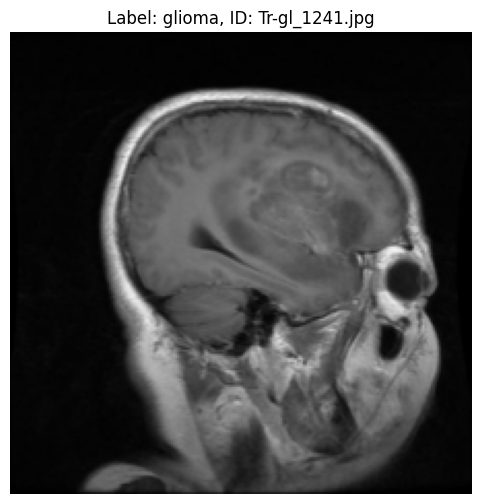

Image: Tr-me_1222.jpg, Label: pituitary, Pred: notumor


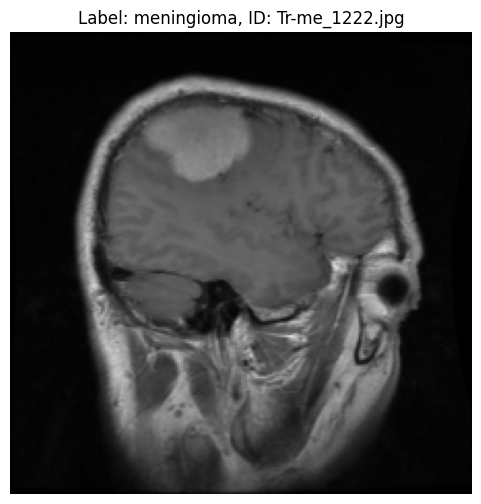

Image: Tr-pi_1219.jpg, Label: notumor, Pred: pituitary


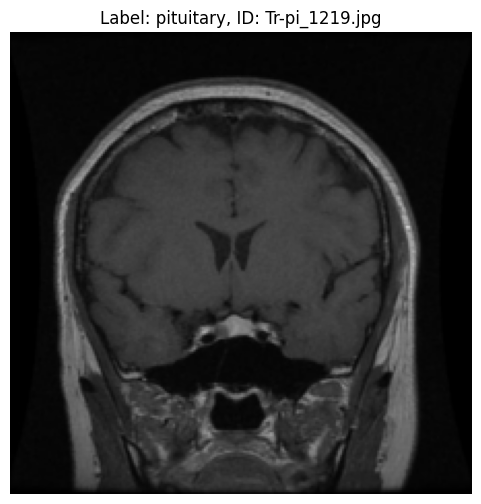

In [10]:
for misclassified_image in misclassified_images:
    label, image_name, pred = misclassified_image
    print(f"Image: {image_name}, Label: {label}, Pred: {pred}")
    image_data = load_images(data_dir, "Training", [image_name], seed=None)[0]
    visualize_image(image_data)

In [15]:
val_misclassified_images = utils.torch.get_misclassified_images(
    model, val_loader, device="cpu"
)
train_misclassified_images = utils.torch.get_misclassified_images(
    model, train_loader, device="cpu"
)

In [16]:
train_counts = count_images(data_dir, "Training")
val_counts = count_images(data_dir, "Testing")

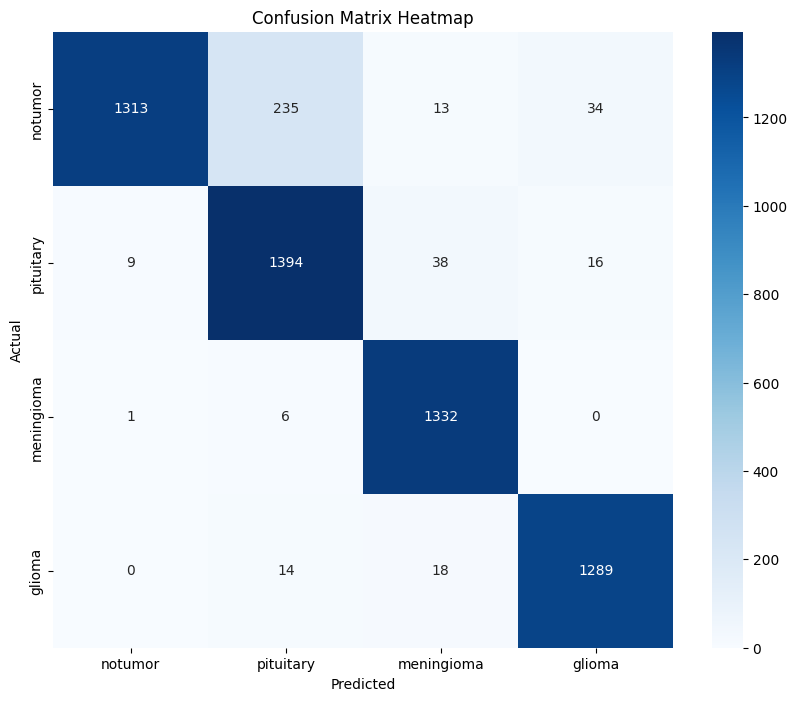

In [18]:
train_confusion_matrix = create_confusion_matrix(train_misclassified_images, train_counts)
plot_confusion_matrix(train_confusion_matrix)

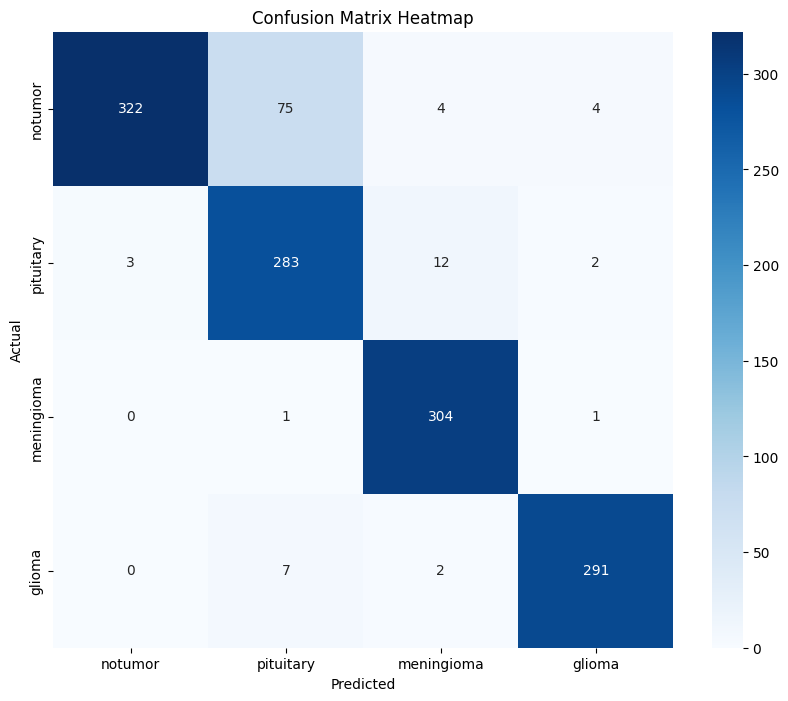

In [19]:
val_confusion_matrix = create_confusion_matrix(val_misclassified_images, val_counts)
plot_confusion_matrix(val_confusion_matrix)